# EU Banking
# Final Report

## 1. Data Importing and Pre-processing

In [4]:
#Import all packages and libaries necessary 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 
from scipy.stats import describe
import scipy.stats as sci 
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import describe

import sqlite3 
import pandas as pd 
import scipy.stats as sci 
from sklearn.linear_model import LinearRegression  
import statsmodels.formula.api as smf 
from scipy.stats import describe 
from sklearn.cluster import KMeans 
from pandas import DataFrame

In [5]:
%pwd

'/Users/kyledalope'

In [6]:
cd '/Users/kyledalope/downloads'

/Users/kyledalope/Downloads


In [5]:
df = pd.read_csv('bank_marketing.csv', sep=";") #import the file

In [8]:
df.head() #View small section of the file

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


### Describe characteristics
With our selected dataset #1, which consists of marketing campaigns of a Portugeuse banking institution. These campaigns were based on phone calls over a time span that goes from May 2008 to November 2010. The dataset have dimensions of 45211 rows x 17 columns, file size of 3.7 MB, is a CSV file type, and consists of the following data types: numeric, categorical, and binary.

In [9]:
df.count() #To see how many rows each column contains

age          43872
job          45211
marital      45211
education    45211
default      43905
balance      45211
housing      45211
loan         45211
contact      43828
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
deposit      45211
dtype: int64

In [10]:
df.isna().sum() #Determine which columns have missing values and how many rows 

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [11]:
df.dtypes #Observe the data types for all of the variables

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

From the 17 columns/variables included in this data set:
 ten are categorical (object),
 six are numerical (int), &
 one is numerical with decimal points (float)

### Clean, wrangle, and handle the missing data
After importing the file, “bank_marketing.csv” into python and observing the columns and the count for each, we concluded to remove any rows that contained a null or blank value. Those columns specifically are age, default, and contact. With a large dataset as such, we labeled any blank data points as NA (isna() function) and removed those rows that contained NA (with dropna() function) to perform the removal of missing data. By doing so, it would not significantly impact our results in any direction. As such, provides a more accurate representation of the data and the points included when undergoing analysis.

In [12]:
round(df.describe(), 2)   #Perform a basic statistic summary and round to two decimal places

,age,balance,day,duration,campaign,pdays,previous
count,43872.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.92,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.61,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [6]:
df1 = df.dropna() #Removing Blanks from the columns age, default, and contact

In [14]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
df1.count() #Observe dataframe with no NA's included

age          41300
job          41300
marital      41300
education    41300
default      41300
balance      41300
housing      41300
loan         41300
contact      41300
day          41300
month        41300
duration     41300
campaign     41300
pdays        41300
previous     41300
poutcome     41300
deposit      41300
dtype: int64

In [16]:
sci.normaltest(df1['age']) #perform a normal test and fine p-value

NormaltestResult(statistic=2776.4324673964015, pvalue=0.0)

To confirm that the dataframe "df1" is cleaned and wrangled without any obvious biases present, of which allowed us to perform analysis thereafter.

## 2. Data Analysis and Visualization

In [17]:
df1.info() #identify categorical, ordinal, and numerical variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41300 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        41300 non-null  float64
 1   job        41300 non-null  object 
 2   marital    41300 non-null  object 
 3   education  41300 non-null  object 
 4   default    41300 non-null  object 
 5   balance    41300 non-null  int64  
 6   housing    41300 non-null  object 
 7   loan       41300 non-null  object 
 8   contact    41300 non-null  object 
 9   day        41300 non-null  int64  
 10  month      41300 non-null  object 
 11  duration   41300 non-null  int64  
 12  campaign   41300 non-null  int64  
 13  pdays      41300 non-null  int64  
 14  previous   41300 non-null  int64  
 15  poutcome   41300 non-null  object 
 16  deposit    41300 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.7+ MB


In [18]:
#Let us see how many Null values are there prior to removing
null_percentage = (df.isnull().sum())/df.shape[0]*100
null_percentage

age          2.961669
job          0.000000
marital      0.000000
education    0.000000
default      2.888678
balance      0.000000
housing      0.000000
loan         0.000000
contact      3.058990
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
deposit      0.000000
dtype: float64

As seen above, NA's for age, default, and contact contain approximately 3% of the whole data set. We agreed to remove them; however, this may cause statistical bias and can be addressed later on.

In [19]:
df1.skew() #Acceptable values of skewness fall between -3 and +3

/var/folders/ml/hxwdg7h13d1gskswfb3tjvc80000gn/T/ipykernel_8824/2444467730.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew() #Acceptable values of skewness fall between -3 and +3


age          0.681967
balance      8.550459
day          0.093367
duration     3.072163
campaign     4.923013
pdays        2.618658
previous    43.296992
dtype: float64

In [20]:
round(df1.describe(), 2) #Clean new dataframe with 2 decimal places

,age,balance,day,duration,campaign,pdays,previous
count,41300.00,41300.00,41300.00,41300.00,41300.00,41300.00,41300.00
mean,40.92,1366.56,15.80,258.27,2.76,40.33,0.58
std,10.60,3074.91,8.32,257.37,3.09,100.35,2.34
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,450.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1431.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,3881.00,63.00,871.00,275.00


In [21]:
#Display the modes for each variable

df1.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,32.0,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


In [22]:
#Listing of all bank clients' education and determine the most common
df1.groupby('education').size().reset_index(name = 'Education Count').sort_values(by='Education Count', ascending=False)

,education,Education Count
1,secondary,21212
2,tertiary,12201
0,primary,6228
3,unknown,1659


In [23]:
#Determine the counts of clients who had one, both, or none of the loan types
df1.groupby(['housing', 'loan']).size().reset_index(name = 'Loan Count').sort_values(by='Loan Count', ascending=False)

,housing,loan,Loan Count
2,yes,no,18999
0,no,no,15749
3,yes,yes,3957
1,no,yes,2595


In [24]:
#Determine the most commmon marital status of bank clients
df1['marital'].value_counts()

married     24887
single      11660
divorced     4753
Name: marital, dtype: int64

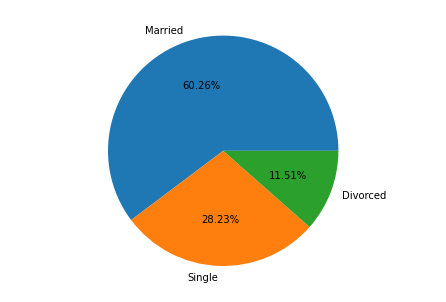

In [25]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
status = ['Married', 'Single', 'Divorced']
counts = [24887, 11660, 4753]
ax.pie(counts, labels = status, autopct='%1.2f%%')
plt.show()

In [26]:
#Determine which month contained the highest duration in phone calls and sort.
contacts_df = df1[['month', 'duration' ]]
contacts_df['month'].value_counts()

may    12572
jul     6284
aug     5759
jun     4876
nov     3630
apr     2681
feb     2404
jan     1273
oct      675
sep      522
mar      432
dec      192
Name: month, dtype: int64

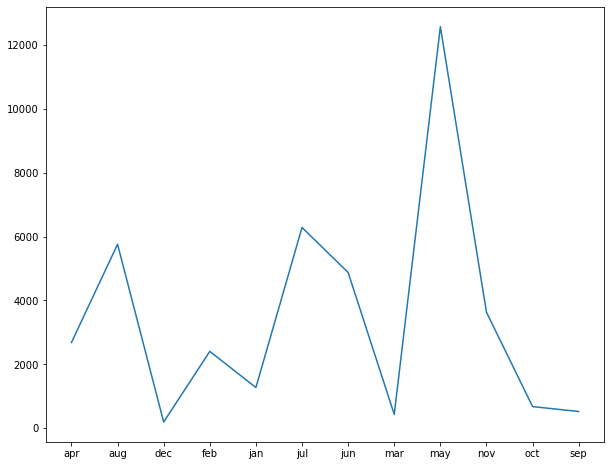

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(contacts_df['month'].value_counts().sort_index())

<AxesSubplot:xlabel='deposit', ylabel='duration'>

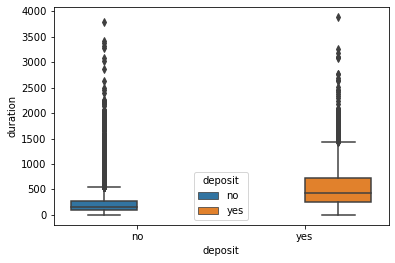

In [28]:
#Create a boxplot comparing the duration of a phone call to a deposit subscription
sns.boxplot(x = df1['deposit'],
            y = df1['duration'],
            hue = df1['deposit'])

In [29]:
describe(df1['age'])

DescribeResult(nobs=41300, minmax=(18.0, 95.0), mean=40.91847457627119, variance=112.32815573980737, skewness=0.6819423920624994, kurtosis=0.3100100925060194)

In [30]:
sci.normaltest(df1['age'])

NormaltestResult(statistic=2776.4324673964015, pvalue=0.0)

The first quartile is 33.0. 
The third quartile is 48.0. 
The IQR is 15.0.
The mean is 40.92.
The standard deviation is 10.6.
The median is 39.0.


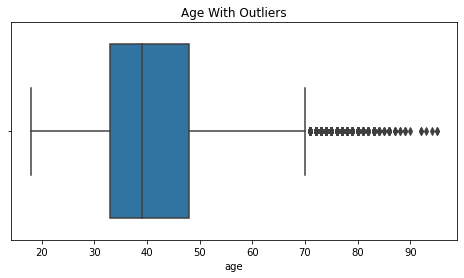

In [31]:
#Boxplot of age WITH outliers
figure1 = plt.figure(figsize = (8,4))
plt.title ('Age With Outliers')
sns.boxplot(x = df1['age'])

#IQR
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3-Q1

mean1 = round(df1['age'].mean(),2)
std1 = round(df1['age'].std(),2)
median1 = round(df1['age'].median(),2)
print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%IQR)
print('The mean is %s.'%mean1)
print('The standard deviation is %s.'%std1)
print('The median is %s.'%median1)

<AxesSubplot:title={'center':'Age Without Outliers'}, xlabel='age'>

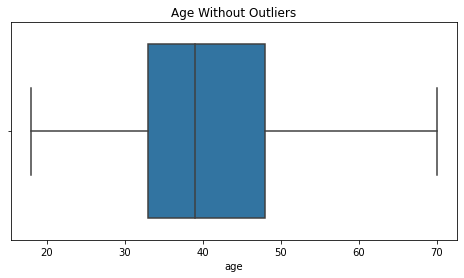

In [32]:
#Boxplot of age WITHOUT outliers
figure1 = plt.figure(figsize = (8,4))
plt.title ('Age Without Outliers')
sns.boxplot(x = df1['age'], showfliers=False)

In [33]:
#Display measures of centrality and distribution

summary = round(df1.describe().T,2)
summary.drop(['count'], axis=1, inplace=True)
summary.rename (columns={'mean':'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', \
                            '25%':'Q1', '50%': 'Median', '75%':'Q3', 'max':'Maximum'}, inplace=True)
summary

,Mean,Standard Deviation,Minimum,Q1,Median,Q3,Maximum
age,40.92,10.60,18.0,33.0,39.0,48.0,95.0
balance,1366.56,3074.91,-8019.0,72.0,450.0,1431.0,102127.0
day,15.80,8.32,1.0,8.0,16.0,21.0,31.0
duration,258.27,257.37,0.0,103.0,180.0,319.0,3881.0
campaign,2.76,3.09,1.0,1.0,2.0,3.0,63.0
pdays,40.33,100.35,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.58,2.34,0.0,0.0,0.0,0.0,275.0


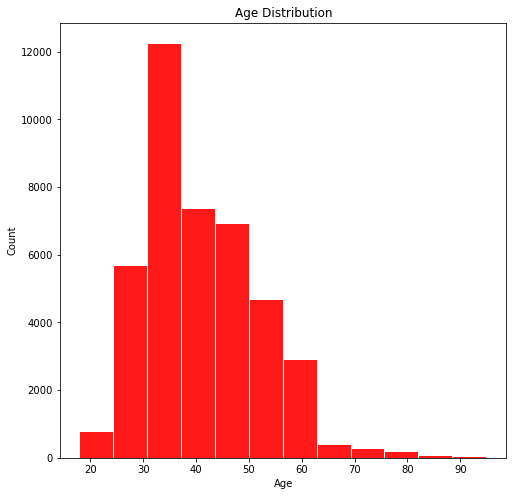

In [34]:
#Histogram of Age Distribution (mean, mode, median)

figure2 = plt.figure(figsize = (8,8))
plt.hist(df1['age'], bins=12, color='red', alpha=0.9, rwidth=.97)
plt.title ('Age Distribution')
plt.xlabel('Age')
plt.ylabel ('Count')
plt.show()

In [35]:
df1['age'].mean()

40.91847457627119

In [36]:
df1['age'].median()

39.0

In [37]:
df1['age'].mode()

0    32.0
dtype: float64

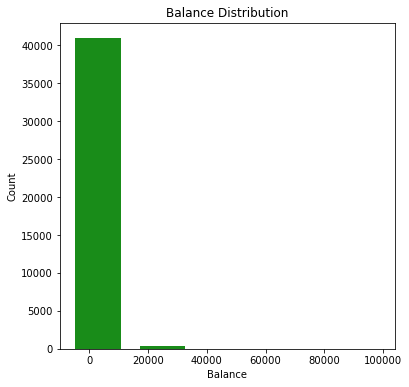

In [38]:
#Histogram to display the distribution of bank client's balance

figure = plt.figure(figsize = (6,6))
plt.hist(df1['balance'], bins=5, color='green', alpha=0.9, rwidth=0.7)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

The majority of the average yearly balances for the bank clients are skewing to one side of the histogram as seen from above. There is a presence of outliers in the balance column, so let's see the balances without the outliers and observed in a boxplot below; representing a better distribution of the average balances.

<AxesSubplot:title={'center':'Balance'}, xlabel='balance'>

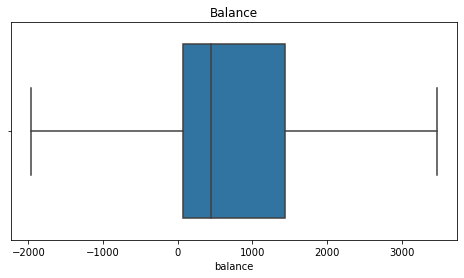

In [39]:
figure1 = plt.figure(figsize = (8,4))
plt.title ('Balance')
sns.boxplot(x = df1['balance'], showfliers=False)

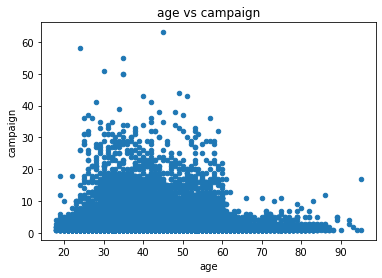

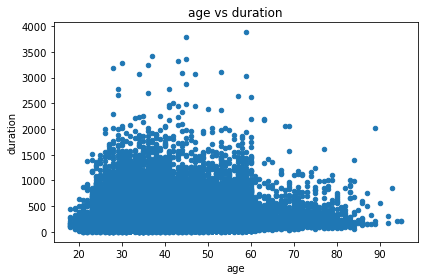

In [40]:
#Create a scatterplot displaying age vs campaign and age vs duration

df1.plot.scatter(x='age', y='campaign', title= "age vs campaign")
df1.plot.scatter(x='age', y='duration', title= "age vs duration")

plt.tight_layout()
plt.show()

From these two scatterplots (age vs campaign and age vs duration), it can be observed that the majority of contacts in the current campaign and the duration that lasted the longest fell between the ages of 20 to 60 years old. This can be used for the banks to target and focus on these particular groups and/or place more focus onto the others for effectiveness.

### Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

In [41]:
df1['deposit'] = df1.deposit.map(dict(yes=1, no=0))
df1['poutcome'] = df1.poutcome.map(dict(unknown=0, other=1, failure=2, success=3))

/var/folders/ml/hxwdg7h13d1gskswfb3tjvc80000gn/T/ipykernel_8824/2396639584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deposit'] = df1.deposit.map(dict(yes=1, no=0))
/var/folders/ml/hxwdg7h13d1gskswfb3tjvc80000gn/T/ipykernel_8824/2396639584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['poutcome'] = df1.poutcome.map(dict(unknown=0, other=1, failure=2, success=3))


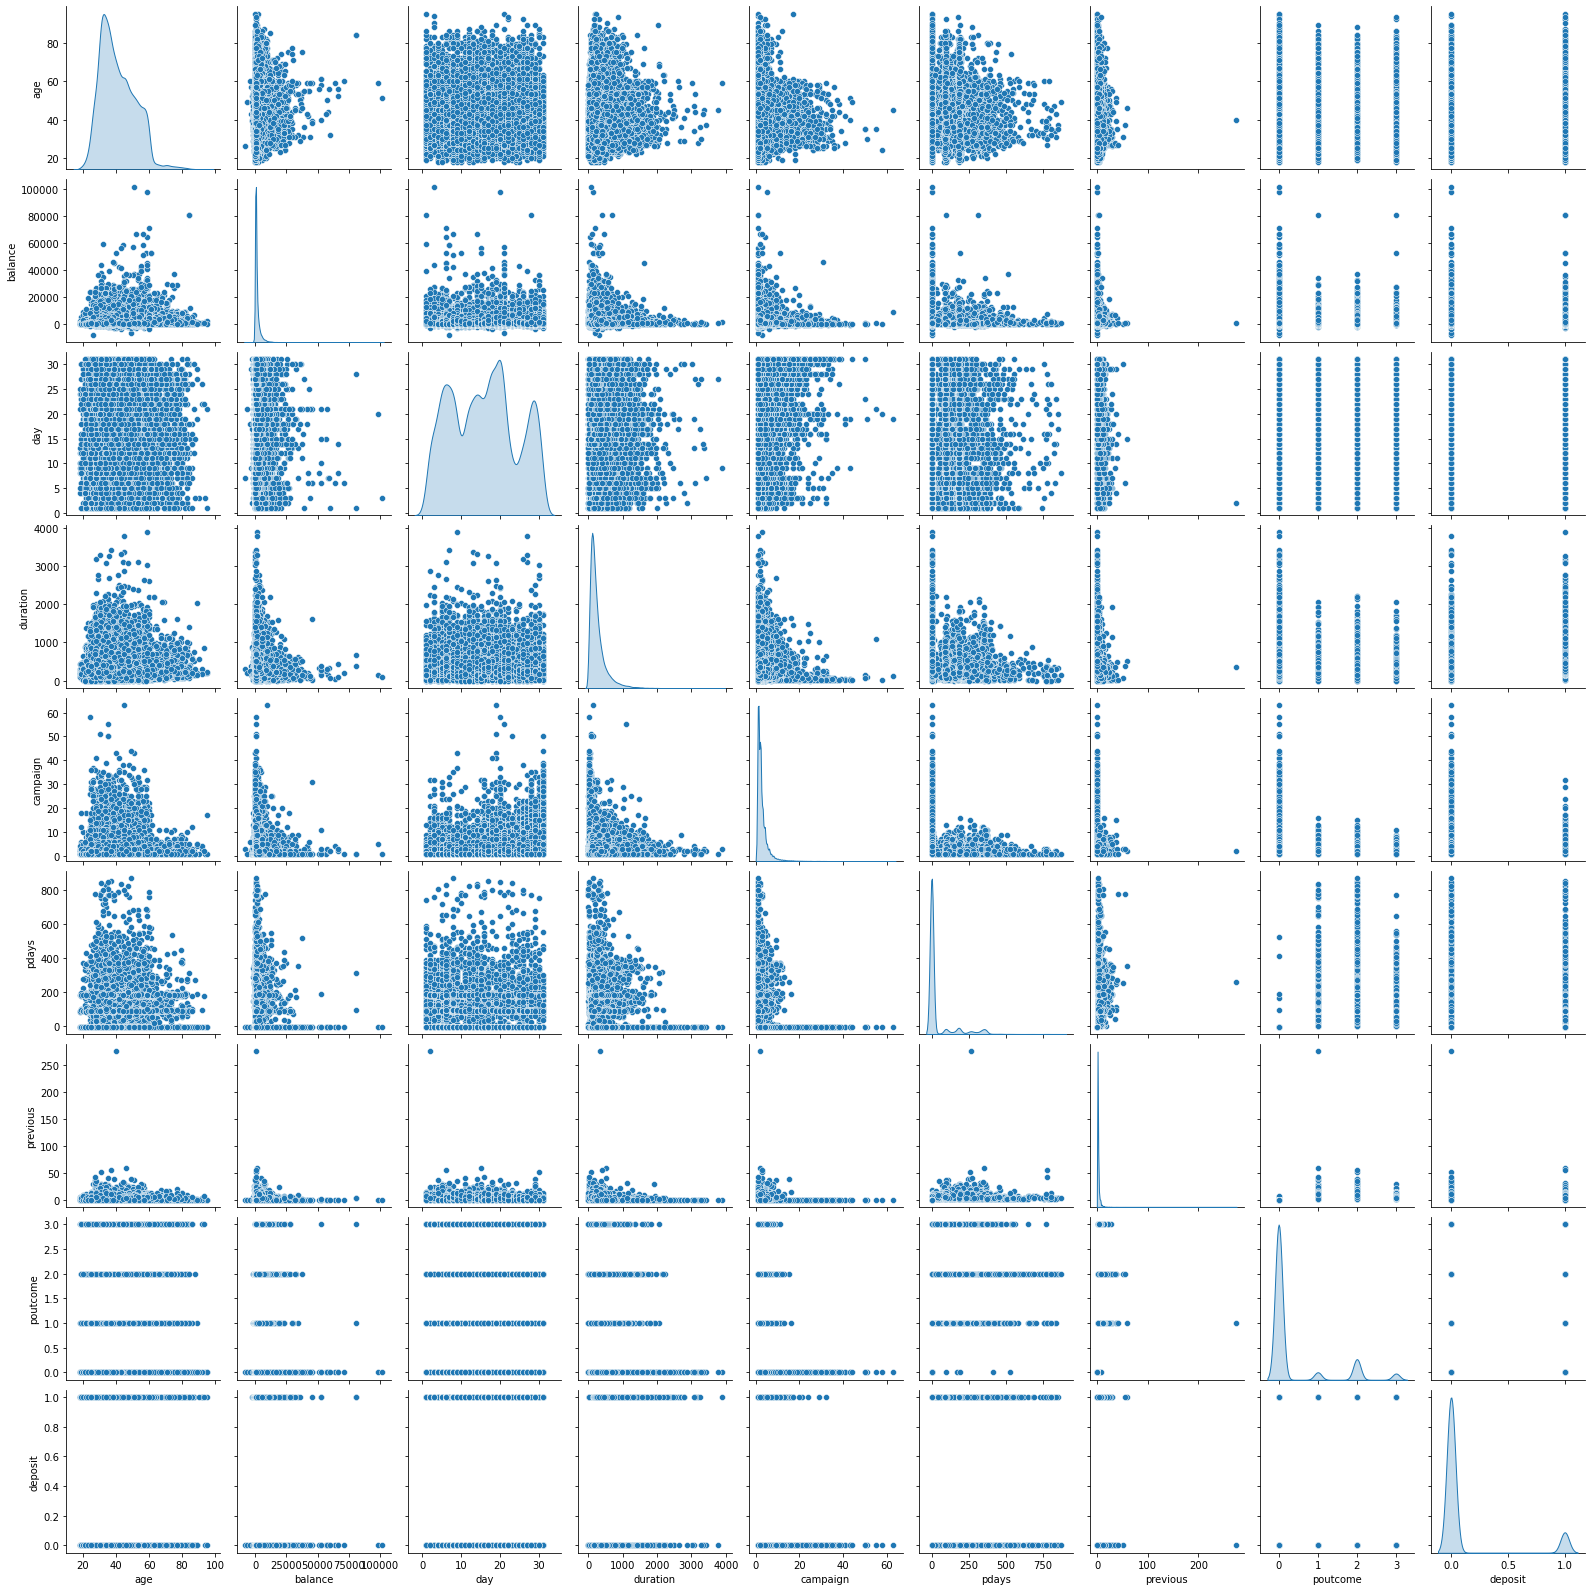

In [46]:
sns.pairplot(data = df1,diag_kind = 'kde',kind="scatter")

With the density map above, we wanted to display the effectiveness of this visual when working with the bank data set which contains many data points and aid us to identify areas of interests. After a thoughtful discussion within our group, the objects of interest varied and due to some limitations we will be analyzing certain combinations of the variables.

### Diagnose correlations between variables and determine indepedent and dependent variables

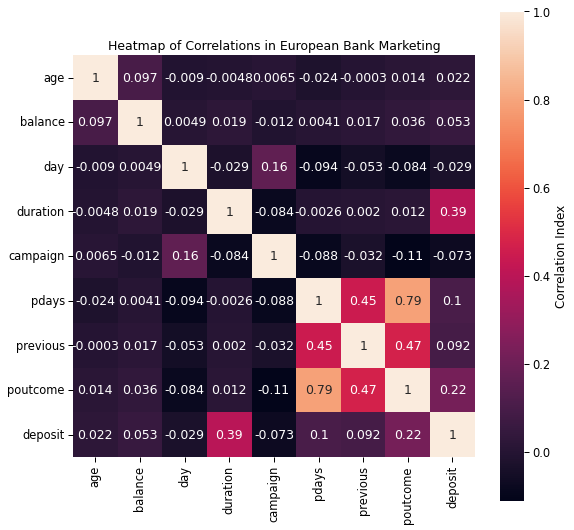

In [47]:
#Correlations between variables using a Heat Map
sns.set_context("paper", rc={"axes.labelsize":12}, font_scale = 1.3)

plt.figure(figsize = (9,9))
x = sns.heatmap(df1.corr(), annot=True, square=True, 
                cbar_kws={'label': 'Correlation Index'})
x.set_title('Heatmap of Correlations in European Bank Marketing')

plt.show()

<AxesSubplot:xlabel='campaign', ylabel='duration'>

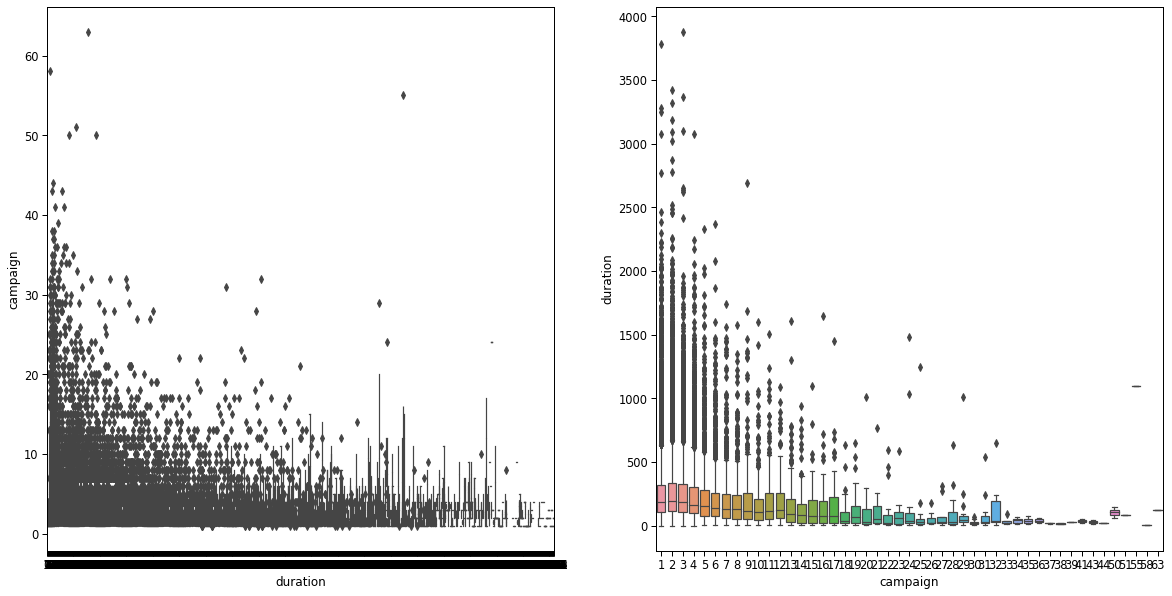

In [57]:
#Observe duration and campaign as boxplots
dim= (20, 10)
fig, axs = plt.subplots(ncols=2, figsize= dim)
sns.boxplot(x='duration',y='campaign', data=df1, ax=axs[0])
sns.boxplot(x='campaign',y='duration', data=df1, ax=axs[1])

The boxplots show that majority of all campaigns are withing duration of 500 and campaign 17. An important observation, was the steep drop at 18 for campaign parameter. It is clear that campaign and balance have strong relationship with age.

<AxesSubplot:xlabel='campaign', ylabel='day'>

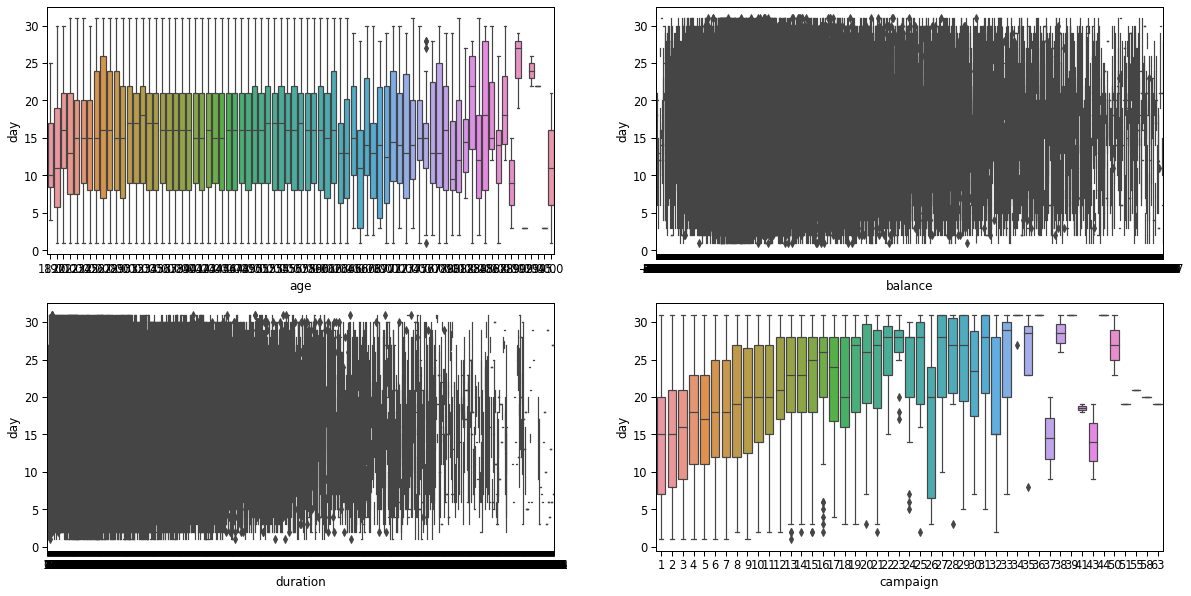

In [58]:
dim= (20, 10)
fig, axs = plt.subplots(2,2, figsize= dim)
sns.boxplot(x='age',y='day', data=df1, ax=axs[0][0])
sns.boxplot(x='balance',y='day', data=df1, ax=axs[0][1])
sns.boxplot(x='duration',y='day', data=df1, ax=axs[1][0])
sns.boxplot(x='campaign',y='day', data=df1, ax=axs[1][1])

Balance and last contact day of the month are relatively steady except for when balance increases, its density decreases. Another note is the region where balance is relatively low same as last contact day of the month. Day vs Duration: as duration increases, last contact day of the month decreases implies that frequency of occurred events decreases. Day vs Campaign: as campaign increases day increases with it, so it has positive relationship. It is important to say that it is different with duration vs campaign (it has negative relationship). However, Day vs Campaign explains why there is a steep drop after campaign 17. As it is shown on the graph as soon as campaign reach campaign 21 it becomes very unpredictible. So, it only make sence that whatever age bracket is below campaign 20 (a target of interest).

<AxesSubplot:xlabel='day', ylabel='duration'>

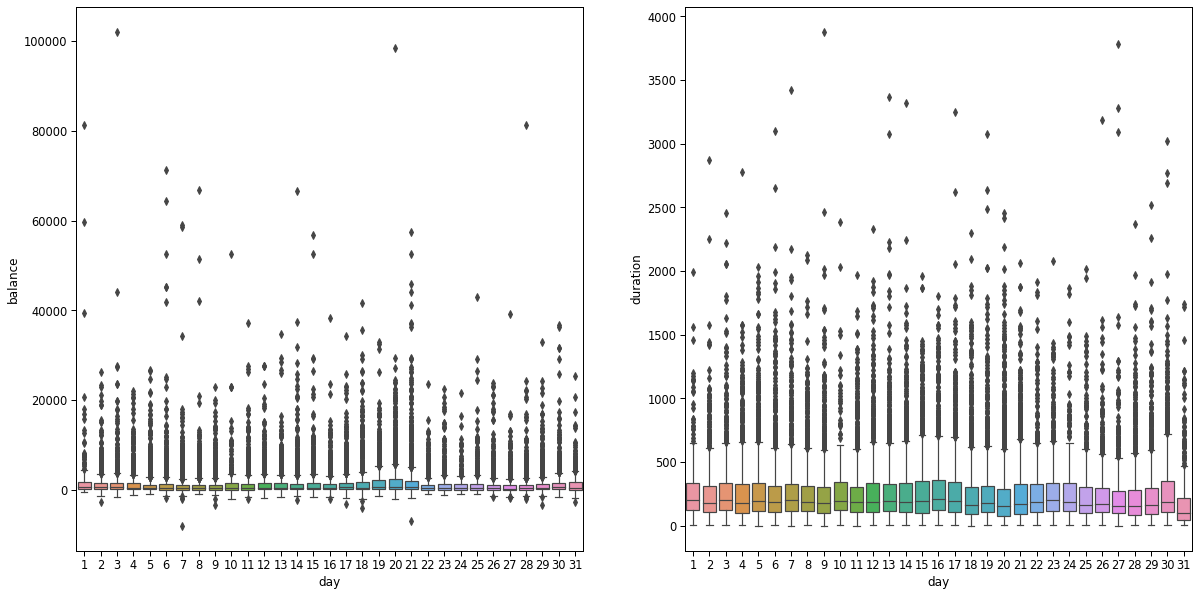

In [59]:
dim= (20, 10)
fig, axs = plt.subplots(ncols= 2, figsize= dim)
sns.boxplot(x='day',y='balance', data=df1, ax=axs[0])
sns.boxplot(x='day',y='duration', data=df1, ax=axs[1])

As we flipped x and y axes, it made it easier to observe the distribution of balance and duration, relative to the day. Balance vs day: there are 3 main picks [1, 3], [18, 21] and [30, 31]. What's noticable is that all those picks relatively have a similar balance. One possible explanation could be of as balance increases people feel more comfortable to spend and take a loan. Similar situation with Duration vs Day, but now range [18, 21] is down trending. Additional research must be done for duration vs day.

<AxesSubplot:xlabel='age', ylabel='day'>

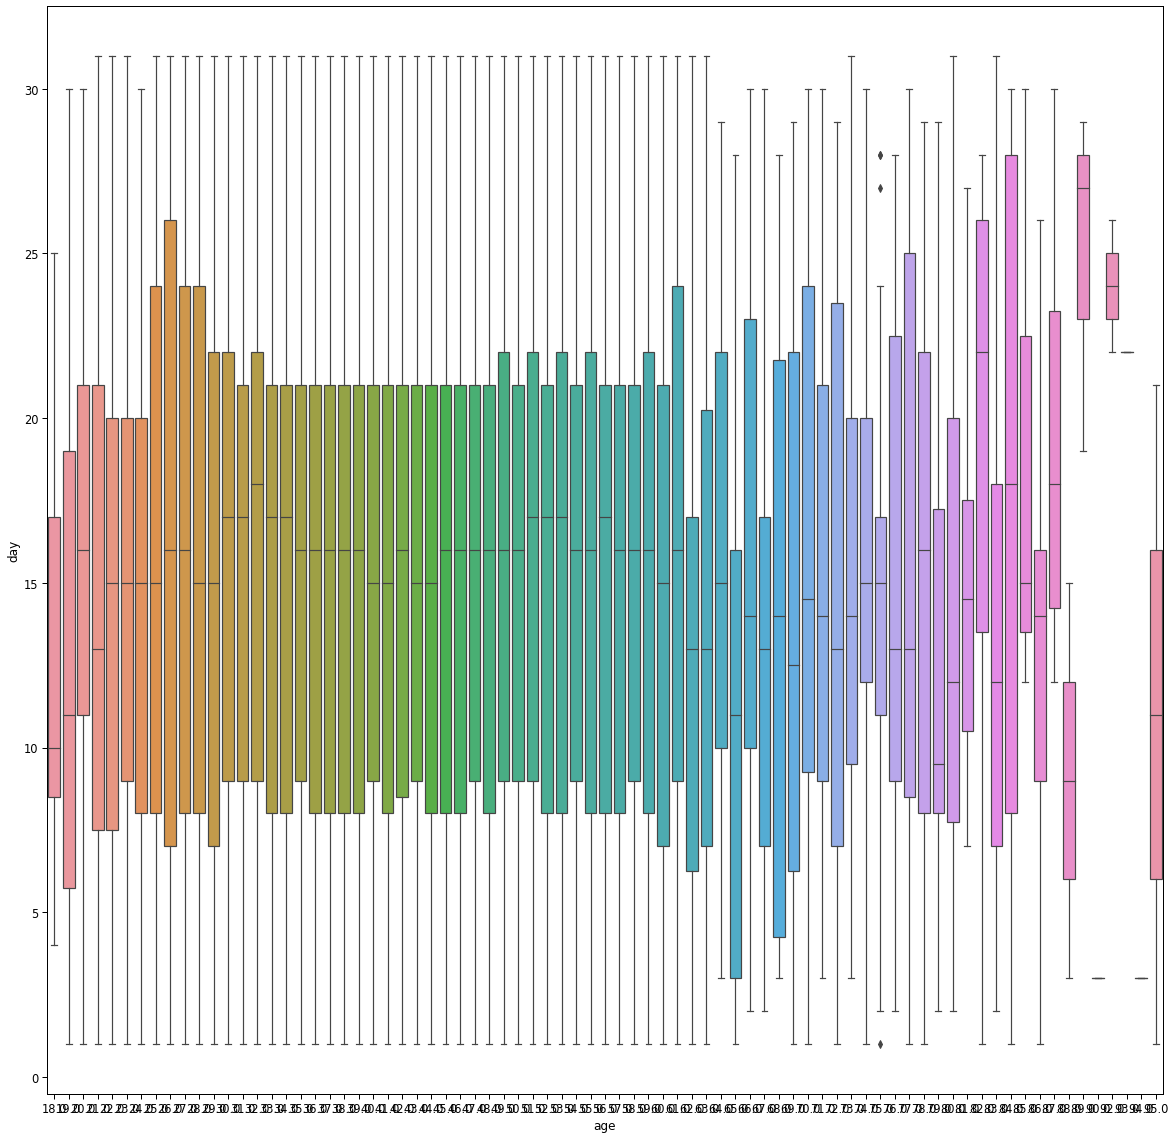

In [60]:
dim= (20, 20)
fig, axs = plt.subplots(figsize= dim)
sns.boxplot(x='age',y='day', data=df1)

With the boxplot above, at 60 years old the last contact day of the month becomes unpredictibe or difficult to predict. Moreover, after age 60 it becomes more common to see people with last contact day of the month below 6 days. At the same time, there are more people who fell above 21 days, which makes this demographic group unstable for prediction or interest of trust (giving them either loan or credit card).

<AxesSubplot:xlabel='day', ylabel='pdays'>

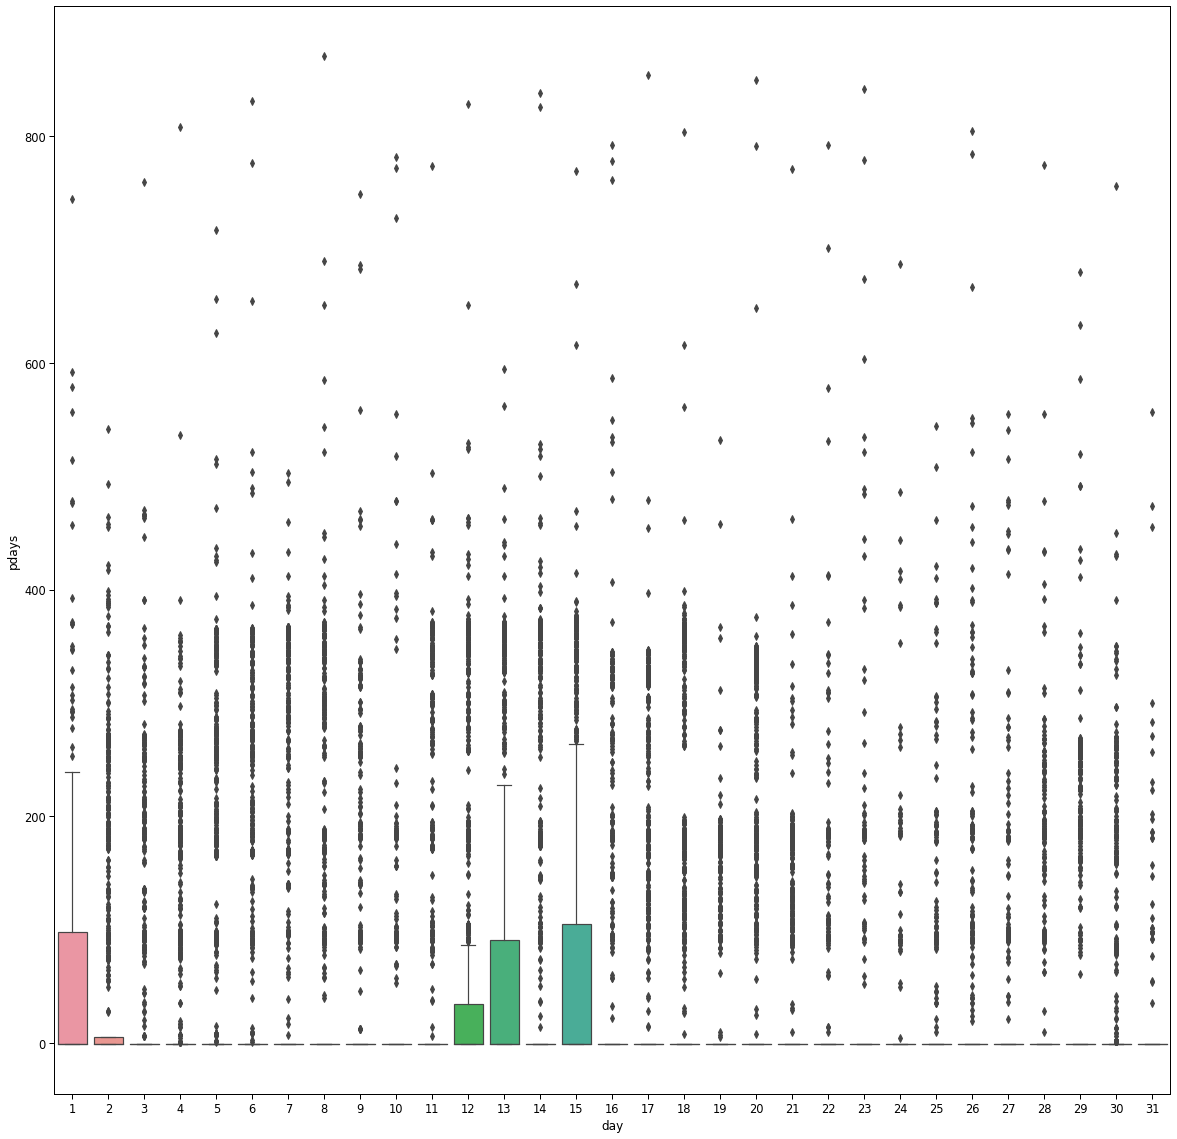

In [61]:
dim= (20, 20)
fig, axs = plt.subplots(figsize= dim)
sns.boxplot(x='day',y='pdays', data=df1)

This is a short view on pdays vs day. There are 5 most populatied regions 1, 2, 12, 13, 15, but it is not over. Study shows that there should be 3 dense regions. They are represented as box plots seen above. Due to its complexity, there are many hidden variables and potentially make it difficult to perform analyses on.

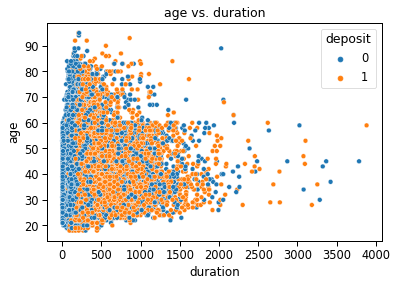

In [48]:
sns.scatterplot(data = df1, x = 'duration', y = 'age',hue = 'deposit')
plt.title('age vs. duration')
plt.show()

## 3. Data Analytics (Machine Learning)

In [49]:
# Change yes and no outputs from variables(column) to 0(no) and 1(yes) for linear regression

df1['loan'] = df1.loan.map(dict(yes=1, no=0))
df1['housing'] = df1.housing.map(dict(yes=1, no=0))
df1['default'] = df1.default.map(dict(yes=1, no=0))

/var/folders/ml/hxwdg7h13d1gskswfb3tjvc80000gn/T/ipykernel_8824/2280597015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan'] = df1.loan.map(dict(yes=1, no=0))
/var/folders/ml/hxwdg7h13d1gskswfb3tjvc80000gn/T/ipykernel_8824/2280597015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['housing'] = df1.housing.map(dict(yes=1, no=0))
/var/folders/ml/hxwdg7h13d1gskswfb3tjvc80000gn/T/ipykernel_8824/2280597015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [50]:
df_ML = df1[['age','job','marital','deposit','balance','education']]

In [51]:
round(df_ML.describe(), 2)

,age,deposit,balance
count,41300.00,41300.00,41300.00
mean,40.92,0.12,1366.56
std,10.60,0.32,3074.91
min,18.00,0.00,-8019.00
25%,33.00,0.00,72.00
50%,39.00,0.00,450.00
75%,48.00,0.00,1431.00
max,95.00,1.00,102127.00


In [52]:
df_ML.head(10)

,age,job,marital,deposit,balance,education
0,58.0,management,married,0,2143,tertiary
1,44.0,technician,single,0,29,secondary
2,33.0,entrepreneur,married,0,2,secondary
3,47.0,blue-collar,married,0,1506,unknown
5,35.0,management,married,0,231,tertiary
6,28.0,management,single,0,447,tertiary
7,42.0,entrepreneur,divorced,0,2,tertiary
8,58.0,retired,married,0,121,primary
9,43.0,technician,single,0,593,secondary
10,41.0,admin.,divorced,0,270,secondary


### Hypothesis 1
Bank clients who are older in age are more likely to subscribe to a term deposit than younger clients

<AxesSubplot:xlabel='deposit', ylabel='age'>

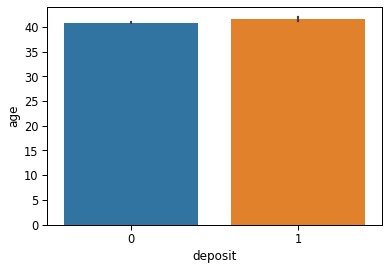

In [53]:
#Create a visual displaying age and deposit
sns.barplot(y=df_ML['age'],x=df_ML['deposit'],data=df_ML)

In [54]:
Yes_age = df_ML['age'][df_ML['deposit']==1].mean() # average age of people who did subscribe
print(Yes_age)

No_age = df_ML['age'][df_ML['deposit']==0].mean() # average age of people who did not subscribe
print(No_age)

41.556294142085584
40.83432001315573


<AxesSubplot:>

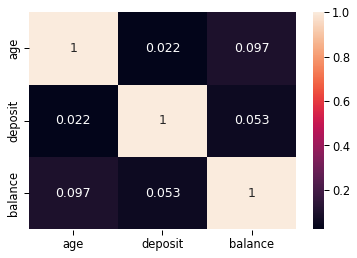

In [55]:
sns.heatmap(df_ML.corr(),annot=True)

With this data, it is observed that age does not correlate to the likelihood of subscribing to a term deposit. Where the average ages who are accepting and declining are very close at 42 and 41 when rounded up, also with litte correlation coefficients as observed in the heatmap.

### Hypothesis 2
When targeting a specific job type and age of bank clients, banks can focus advertisements to those to increase term deposit subscriptions.

<AxesSubplot:xlabel='job', ylabel='age'>

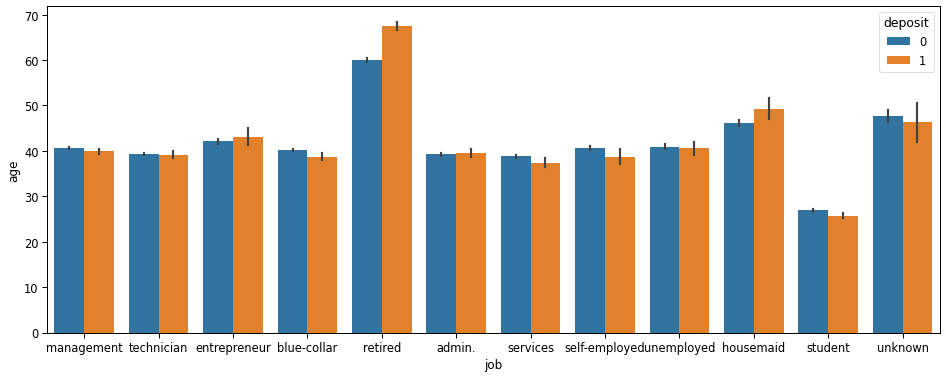

In [56]:
#Create a visual displaying the variables job, age, and deposit

plt.figure(figsize=(16,6))
sns.barplot(x = 'job',y = 'age',hue = 'deposit',data=df_ML)

As observed from the barplot above, representing the age and job types for bank clients who subscribed or not to a term deposit. The data suggests that those who are retired are more likely to consider the subscription to a term deposit, consisting with the most responses received when compared to the other job types.

/Users/kyledalope/opt/miniconda3/envs/ADS500B/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='marital'>

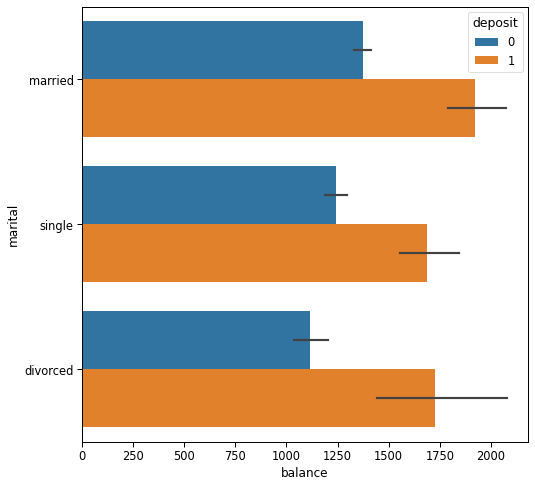

In [64]:
#Visualize if the marital status and balance has a correlation to deposit 

plt.figure(figsize=(8,8))
sns.barplot(df['balance'],df1['marital'],hue = df1['deposit'],data=df1)

With the barplot above, it was observed that bank clients with higher balances were more likely to subscribe to a term deposit. The visualization suggests that married bank clients were more interested into the subscription when compared to the single and divorced clients.

/Users/kyledalope/opt/miniconda3/envs/ADS500B/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='education'>

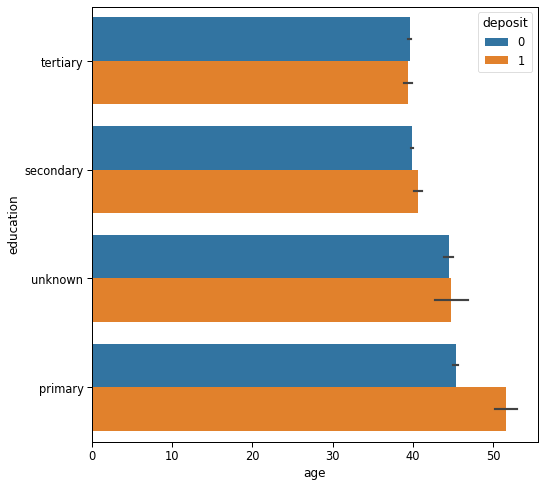

In [65]:
#Visualize the relationship of age and education to deposit

plt.figure(figsize=(8,8))
sns.barplot(df1['age'],df['education'],hue = df1['deposit'],data=df1)

With this relationship, it was observed that the "unknown" output composed of a majority of the data in the education column. While this skews the results, it was still of interest to determine if any relationship existed to a deposit.

## Machine Learning Classification (Supervised)

To predict whether or nota given customer subscribes to a term deposit. In fact, we wanted to predict the value of the categorical variable "deposit" as yes or no for a given customer.

### Multiple Logistic Regression

In [68]:
# Created dummy variables for categorical variables

categorical_variables=['job','marital','education']
for var in categorical_variables:
    categorical_list='var'+'_'+var
    categorical_list = pd.get_dummies(df1[var], prefix=var)
    df_d=df_ML.join(categorical_list)
    df_ML=df_d
categorical_variables=['job','marital','education']
data_vars=df_d.columns.values.tolist()
keep=[i for i in data_vars if i not in categorical_variables]


In [69]:
df_d.head()

,age,job,marital,deposit,balance,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58.0,management,married,0,2143,tertiary,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44.0,technician,single,0,29,secondary,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,33.0,entrepreneur,married,0,2,secondary,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,47.0,blue-collar,married,0,1506,unknown,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35.0,management,married,0,231,tertiary,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [70]:
df_d.drop(columns = ['job','marital','education'],inplace = True)

In [71]:
df_d.head() #view new dataframe

,age,deposit,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58.0,0,2143,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44.0,0,29,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,33.0,0,2,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,47.0,0,1506,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35.0,0,231,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df_d.drop(columns=['deposit'],inplace = False)

y = df_d['deposit']

In [79]:
X.head()

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58.0,2143,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44.0,29,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,33.0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,47.0,1506,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35.0,231,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: deposit, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/kyledalope/opt/miniconda3/envs/ADS500B/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
logreg.coef_

array([[ 2.08212460e-03,  3.27969488e-05, -1.39207694e-01,
        -6.52046565e-01, -3.30986429e-01, -1.38160351e-01,
        -2.06663786e-01,  7.73919033e-01, -1.60870273e-01,
        -4.99784805e-01,  3.61196636e-01, -3.19907246e-01,
         1.22862797e-01, -2.61459842e-02, -5.17838729e-01,
        -5.45562820e-01, -1.52393116e-01, -5.85677796e-01,
        -3.68965088e-01, -1.38675988e-01, -1.22475793e-01]])

In [83]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[10887     3]
 [ 1499     1]]


### Results

In conclusion, with the use of supervised machine learning (multiple logistic regression) we were able to produce an accuracy logistic regresssion classifier of 0.88 as seen above. 

X = Indepedent variable(s): age, job, marital, balance, and education

Y = Dependent variable(s): deposit

### Multiple Linear Regression (Balance)

In [85]:
df1 = df1[df1['age']<=80]

In [86]:
df2 = df1[['balance','duration','loan','campaign']]

In [87]:
df2.head(15)

,balance,duration,loan,campaign
0,2143,261,0,1
1,29,151,0,1
2,2,76,1,1
3,1506,92,0,1
5,231,139,0,1
6,447,217,1,1
7,2,380,0,1
8,121,50,0,1
9,593,55,0,1
10,270,222,0,1


<AxesSubplot:>

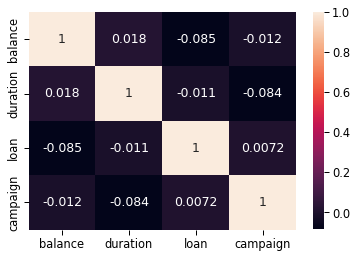

In [88]:
sns.heatmap(df2.corr(),annot = True)

The heatmap above demonstrates that balance is poorly correlated with the other features.

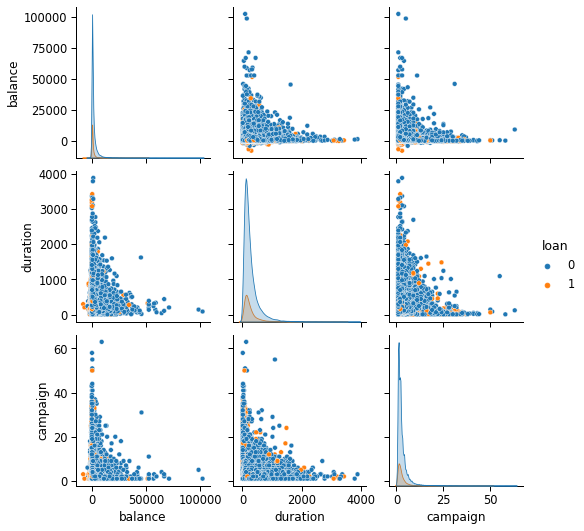

In [89]:
sns.pairplot(df2,diag_kind = 'kde',hue= 'loan')

In [90]:
X = df2.drop(columns=['balance'],inplace = False)
y = df2['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [91]:
linearModel.coef_

array([ 1.31903696e-01, -7.14021966e+02, -9.47789640e+00])

In [92]:
linearModel.intercept_

1453.8869764218243

Regression Equation:

balance = 1453.89 + 1.32e-01 * duration - 7.14e+02 * loan - 9.48 * campaign

In [93]:
y_predict = linearModel.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)
error_same_unit = (mean_squared_error(y_test,y_predict))**0.5
error_same_unit

3246.3560992924504

In [95]:
df1['balance'].mean()

1361.705175802577

/Users/kyledalope/opt/miniconda3/envs/ADS500B/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted')

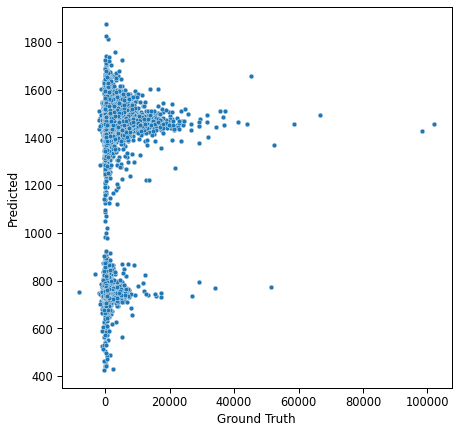

In [96]:
plt.figure(figsize = (7,7))
sns.scatterplot(y_test,y_predict)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')

Accuracy of the model is not acceptable. Further data cleaning is needed.

The first quartile is 33.0. 
The third quartile is 48.0. 
The IQR is 15.0.
The mean is 1361.71.
The standard deviation is 3025.29.
The median is 450.0.


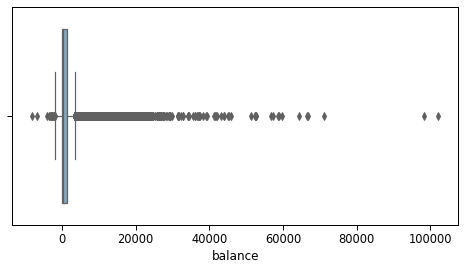

In [98]:
figure1 = plt.figure(figsize = (8,4))

sns.boxplot(x = df2['balance'],palette="PuBu", orient='h')

#IQR
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3-Q1

mean1 = round(df2['balance'].mean(),2)
std1 = round(df2['balance'].std(),2)
median1 = round(df2['balance'].median(),2)
print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%IQR)
print('The mean is %s.'%mean1)
print('The standard deviation is %s.'%std1)
print('The median is %s.'%median1)

Next step is to remove the outliers in 'balance'.

In [99]:
#Finding outliers for balance 
df2_outlier = df2.loc[(df2['balance'] <Q1-(1.5*IQR)) | (df2['balance'] >  Q3+(1.5*IQR))]
average_balance = round(df2.balance.mean(), 2)
print('The average of balance in the original data frame is %s.' % average_balance)
average_balance_df2_outlier= round(df2_outlier.balance.mean(),2)
print('The average of balance of outliers is %s.' % average_balance_df2_outlier)


The average of balance in the original data frame is 1361.71.
The average of balance of outliers is 1451.31.


<AxesSubplot:title={'center':'Balance Without Outliers'}, xlabel='balance'>

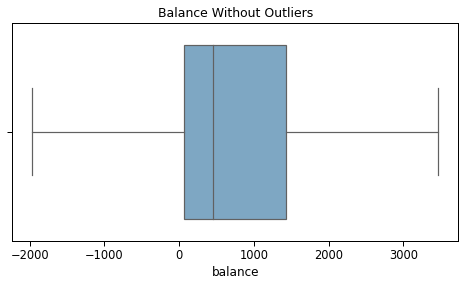

In [100]:
# Boxplot of balance without outliers 
figure1 = plt.figure(figsize = (8,4))
plt.title ('Balance Without Outliers')
sns.boxplot(x = df2['balance'],palette="PuBu", orient='h',showfliers = False)

In [101]:
X = df2.drop(columns=['balance','campaign'],inplace = False)
y = df2['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [102]:
linearModel.coef_

array([ 2.27678371e-01, -6.96274568e+02])

In [103]:
linearModel.intercept_

1397.1216557614268

In [104]:
y_predict = linearModel.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)
error_same_unit = (mean_squared_error(y_test,y_predict))**0.5
error_same_unit

3122.495045179124

Regression Equation:

balance = 3122.50 + 2.28e-01 * duration - 6.96e+02 * loan

In [106]:
#Single Linear Regression

X = np.array(df2['loan'])
y = df2['balance']

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.3)
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [107]:
y_predict = linearModel.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)
error_same_unit = (mean_squared_error(y_test,y_predict))**0.5
error_same_unit

2961.8429095479146

#### In this sub-section we are going to explore more models combining both R and Python

Remark, R model used to find relationship between variable and trained variable while Python was used to predict the model. It was done for the purpose of knowing bias values before making any predictions. Such approach shortening Analytical process and finding relationship between variables more effective

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R -i df1
library(Amelia)
library(ggvis)
library(ggplot2)
library(ggpubr)
library(MLmetrics)
library(viridis)
library(tidyverse)
library(hrbrthemes)
library(gridExtra)
library(cluster)
library(ggplot2)
library(ggpubr)
library(MLmetrics)
library(DBI)
library(mclust)

In [10]:
df= pd.read_csv('bank_marketing.csv')

In [11]:
df['loan']= df.deposit.map(dict(yes=1, no=0))

In [12]:
df1= df.dropna() # use it for age vs default vs contact

In [13]:
%%R -i df1

df2 <- subset(df1,select=
              c(1,5,6,7,8,10, 12, 13, 14)) #a new dataset

In [15]:
%%R -i df1

df4 <-subset(df2, df2$age <=80)

In [16]:
%%R -i df1

train <- df4[1:25000,] #used to teach ML
test <- df4[25001:41299,] #subject for the test

In [17]:
%%R -i df1

model1 <- lm(age ~.,data=train) #trained model1 for any relaitionship to the age
summary(model1) #inspect model1


Call:
lm(formula = age ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.2753  -7.4821  -0.9223   7.0853  22.8884 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.416e+01  1.698e-01 260.019  < 2e-16 ***
defaultyes  -1.543e+00  3.776e-01  -4.088 4.37e-05 ***
balance      2.270e-04  1.939e-05  11.704  < 2e-16 ***
housingyes  -3.804e+00  1.174e-01 -32.411  < 2e-16 ***
loan        -3.895e-01  3.105e-01  -1.254   0.2097    
day         -3.695e-02  7.411e-03  -4.987 6.19e-07 ***
duration    -1.464e-03  2.630e-04  -5.567 2.62e-08 ***
campaign    -1.148e-02  1.621e-02  -0.708   0.4788    
pdays        5.298e-03  2.180e-03   2.430   0.0151 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.159 on 24991 degrees of freedom
Multiple R-squared:  0.05071,	Adjusted R-squared:  0.05041 
F-statistic: 166.9 on 8 and 24991 DF,  p-value: < 2.2e-16



Comparison to smaler data set the relationship between age and loan decreased and other parameter emrgied from the darkness named campaign. As it is shown from the above there are three statistically significant variables campaign, pdays, and loan. Those variables are going to be tested through performing linear dependence test. 

In [23]:
#predictive model for age
model1 = sm.OLS(df1['age'],df1.loc[:,['balance', 'day', 'duration', 'pdays']]).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    age   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                          3.834e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:01:30   Log-Likelihood:                     -1.8121e+05
No. Observations:               41300   AIC:                                  3.624e+05
Df Residuals:                   41296   BIC:                                  3.625e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This model is 78.8% accurate which is not bad. Initially excpeted that balance will be a better indicator in order to determine age, but it was incorrect hypothesies

In [19]:
%%R -i df1

model2 <- lm(duration ~.,data=train) #model baised on balance
summary(model2) #insepct model


Call:
lm(formula = duration ~ ., data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-815.2 -125.1  -58.6   57.1 3189.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.796e+02  7.658e+00  36.510  < 2e-16 ***
age         -8.461e-01  1.520e-01  -5.567 2.62e-08 ***
defaultyes  -1.210e+01  9.080e+00  -1.333  0.18258    
balance      7.779e-04  4.675e-04   1.664  0.09611 .  
housingyes   1.488e+01  2.879e+00   5.167 2.40e-07 ***
loan         6.135e+02  6.377e+00  96.206  < 2e-16 ***
day         -9.389e-01  1.782e-01  -5.270 1.37e-07 ***
campaign    -4.879e+00  3.885e-01 -12.559  < 2e-16 ***
pdays       -1.717e-01  5.240e-02  -3.276  0.00105 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 220.2 on 24991 degrees of freedom
Multiple R-squared:  0.2784,	Adjusted R-squared:  0.2782 
F-statistic:  1205 on 8 and 24991 DF,  p-value: < 2.2e-16



Relative to smaler data set the relationship between duration and balance increased. Moreover, it did not just increase, but a new more significant variable was formed "default"

In [20]:
model2 = sm.OLS(df1['duration'],df1.loc[:,['age', 'balance', 'pdays', 'campaign', 'loan', 'day']]).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:               duration   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              8665.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                        0.00
Time:                        16:48:35   Log-Likelihood:                     -2.8540e+05
No. Observations:               41300   AIC:                                  5.708e+05
Df Residuals:                   41294   BIC:                                  5.709e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

There are two main parameters that increase prediction model age and loan respectivelly. It was not a surprice since it was observed that there should be some relationship between these parameters accurate 55.7% of the time. Note [3] indicates that there are strong multicollinearity or other numerical problems, strong relationship between variables that were used to predicte duration. It is not a surprise because age, campaign, pdays, and loan have valuable relationship between each other. This result indicates that model1 should be explored more thoroughfully in the future

In [21]:
%%R -i df1

model3 <- lm(day ~.,data=train) #model baised on loan
summary(model3) #inspect model3


Call:
lm(formula = day ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.7307  -6.7668   0.7833   5.4610  16.1365 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.687e+01  2.577e-01  65.461  < 2e-16 ***
age         -2.690e-02  5.394e-03  -4.987 6.19e-07 ***
defaultyes   1.705e-01  3.222e-01   0.529  0.59678    
balance      3.094e-05  1.659e-05   1.865  0.06216 .  
housingyes   1.602e-01  1.022e-01   1.567  0.11703    
loan         7.627e-01  2.649e-01   2.880  0.00398 ** 
duration    -1.182e-03  2.244e-04  -5.270 1.37e-07 ***
campaign     4.304e-01  1.356e-02  31.741  < 2e-16 ***
pdays        1.500e-02  1.858e-03   8.073 7.17e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.814 on 24991 degrees of freedom
Multiple R-squared:  0.04366,	Adjusted R-squared:  0.04335 
F-statistic: 142.6 on 8 and 24991 DF,  p-value: < 2.2e-16



There are multiple statistially significant relations

In [22]:
#linear model for day
model3 = sm.OLS(df1['day'],df1.loc[:,['age', 'campaign', 'pdays', 'duration']]).fit() 
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    day   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                          3.078e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                        0.00
Time:                        16:48:46   Log-Likelihood:                     -1.4911e+05
No. Observations:               41300   AIC:                                  2.982e+05
Df Residuals:                   41296   BIC:                                  2.983e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This model is 74.9% of the time correct and can predict day baised on chosen variables

Summary, there are 3 models: model1, model2, model3. Model1 -> 78.8% accuracy, model2 -> 55.7%, model3 -> 74.9%. Initially model 1 has 55.8% accuracy, but after some analysis it was being improved to 78.8%. It is a decene model a specially if it will be used as a model to make clasifie people in groups at use appropriate approach to their age croup. It will may increase customer service and customers' satisfaction rate